# David Akinyemi
### February 7, 2020
The purpose of this notebook is to convert a pdf text into a network of words based on co-occurence in sentences and based on proximity.  
I worked with and recieved help from Margaret Smith, Julia Middlebrook, Max Lauster, Max MacAvoy, Nicolas Beati and Dinos Lafkaritis.

### Inference
I chose to infer from my text by connecting the two words that were next to each other because when I compare the interim report to the final report I can take a look at the sort of words being used and the specific context based off of the words within close proximity. 

Similar to when I was only working with chapter 2 of the interim data report I will now track "ability", "data", "skills", "knowlegde", "learning", "science", "engineering" and "engineer" across my chapters. This is a larger tracking group than I used previously and contains many popular STEM words so I expect for them to stand out in the visualizations.

In [1]:
#Tracked words
tracking <- c("ability", "data", "skills", "knowlegde", "learning", "science", "engineering", "engineer")

In [2]:
# Store string containing all required packages 
packages <- c("pdftools", "stringr", "igraph")

In [3]:
# Store all installed packages
installed <- installed.packages()
# Convert all installed packages to df
installed <- as.data.frame(installed)
# Extract only the Package column from df; store as character vector
installed <- as.character(installed$Package)
# Check whether required packages are already installed
packages[packages %in% installed]

[1] "pdftools" "stringr"  "igraph"

In [4]:
# Load required packages
library(pdftools)
library(stringr)
library(igraph)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



# Final Report

In [5]:
# Extract text from pdf
# Each page of pdf is one row
final_report <- pdf_text("FinalNASDSreport.pdf")
# Convert text to dataframe
final_report <- as.data.frame(final_report)

In [74]:
#View Data frame
#final_report

In [7]:
#Subset the the specific 
#pages for chapter 2
chapter_2 <- as.data.frame(final_report[31:54,])
#head(chapter_2)

In [8]:
#Create a for loop to help 
#add all the texts within these pages
#to one long string
alltext <- ""
for (r in 1:nrow(chapter_2)) {
    alltext <- paste(alltext, chapter_2[r,], sep = "")
}

In [9]:
#Convert all the text back
#back to a chapter 2 label
chapter_2 <- alltext

In [75]:
# Replace all instances of "\n" with a space - use escape characters
chapter_2 <-str_replace_all(chapter_2, "\\\n", " ")
#head(chapter_2)

In [11]:
# Replace all instances of the parenthesis with a space
chapter_2 <-str_replace_all(chapter_2, "\\(", " ")
chapter_2 <-str_replace_all(chapter_2, "\\)", " ")

In [12]:
# Replace all instances of the "•" with a space
chapter_2 <-str_replace_all(chapter_2, "•", " ")

In [76]:
#View changes
#head(chapter_2)

In [14]:
# Replace all instances of the comma with a space
chapter_2 <-str_replace_all(chapter_2, ",", " ")

In [15]:
# Replace all instances of the colon with a space
chapter_2 <-str_replace_all(chapter_2, ":", " ")

In [16]:
# Replace all instances of the small hypen with a space
chapter_2 <-str_replace_all(chapter_2, "-", " ")

In [17]:
# Delete all quotation marks
chapter_2 <-str_replace_all(chapter_2, "“", " ")
chapter_2 <-str_replace_all(chapter_2, "”", " ")

In [18]:
# Delete all big hypens
chapter_2 <-str_replace_all(chapter_2, "—", "")

In [19]:
# Replace all instances of "\a" with a space - use escape characters
chapter_2 <-str_replace_all(chapter_2, "\\\a", " ")

In [20]:
# Delete all semicolons
chapter_2 <-str_replace_all(chapter_2, ";", " ")

In [21]:
# Replace multiple spaces with one space
# s+ means 1 or more spaces.  \\ are excape characters
chapter_2 <-str_replace_all(chapter_2, "\\s+", " ")

In [22]:
# Convert all text to lowercase
chapter_2 <- tolower(chapter_2)

In [23]:
# Delete spaces at the start and end of our text
chapter_2 <-trimws(chapter_2)

In [77]:
#View changes
#chapter_2

In [25]:
# Create an empty dataframe to hold our edge list
# It should start with 2 columns and 0 rows
# A for-loop will add to it
edge_list <- as.data.frame(matrix(nrow = 0, ncol = 2))
# Specify row names
colnames(edge_list) <- c("word_1", "word_2")

In [26]:
# Create an empty dataframe to hold each word/sentence combination
# It should have 2 columns and 1 row
# A for-loop will overwrite this for each loop
w_s_comb <- as.data.frame(matrix(nrow = 1, ncol = 2))
# Specify row names
colnames(w_s_comb) <- c("word_1", "word_2")

In [27]:
# Split the text into words
# Store those words in a variable
chapter_2_words <- strsplit(chapter_2, " ")[[1]]

In [78]:
#chapter_2_words

In [29]:
# Write a for loop that, on each loop over the list of all words:
## Stores the current word in a variable word_1
## Stores the next word in a variable word_2
## Stores word_1 in the word_1 column of the one-row dataframe
## Stores word_2 in the word_2 column of the one-row dataframe
## Binds the (re-writable) dataframe to the (now not empty) dataframe
for (r in 1:(length(chapter_2_words)-1)) {
    word_1 <- chapter_2_words[r]
    word_2 <- chapter_2_words[r+1]
    w_s_comb$word_1 <- word_1
    w_s_comb$word_2 <- word_2
    edge_list <- rbind(w_s_comb, edge_list)
}

In [30]:
# Look at our edge list
head(edge_list)

,word_1,word_2
,<chr>,<chr>
1,rights,reserved.
2,all,rights
3,sciences.,all
4,of,sciences.
5,academy,of
6,national,academy


In [31]:
# Convert our edge list to the R data type matrix
edge_list <- as.matrix(edge_list)

In [32]:
# Create a network graph object
edge_list.net <- graph.edgelist(edge_list)

In [33]:
#Makes every word we are tracking a square shape
V(edge_list.net)[V(edge_list.net)$name %in% tracking]$shape <- "square"

In [34]:
#Makes every word we are NOT tracking a circle shape
V(edge_list.net)[!V(edge_list.net)$name %in% tracking]$shape <- "circle"

In [35]:
#Makes every word we are tracking the color cornflowerblue
V(edge_list.net)[V(edge_list.net)$name %in% tracking]$color <- "cornflowerblue"

In [36]:
#Finding the rgb values for pink
col2rgb("pink")

red,255
green,192
blue,203


In [37]:
#Makes every word we are NOT tracking a light transparent pink color
V(edge_list.net)[!V(edge_list.net)$name %in% tracking]$color <- rgb(255, 192, 203, max = 255, alpha = 127.5)

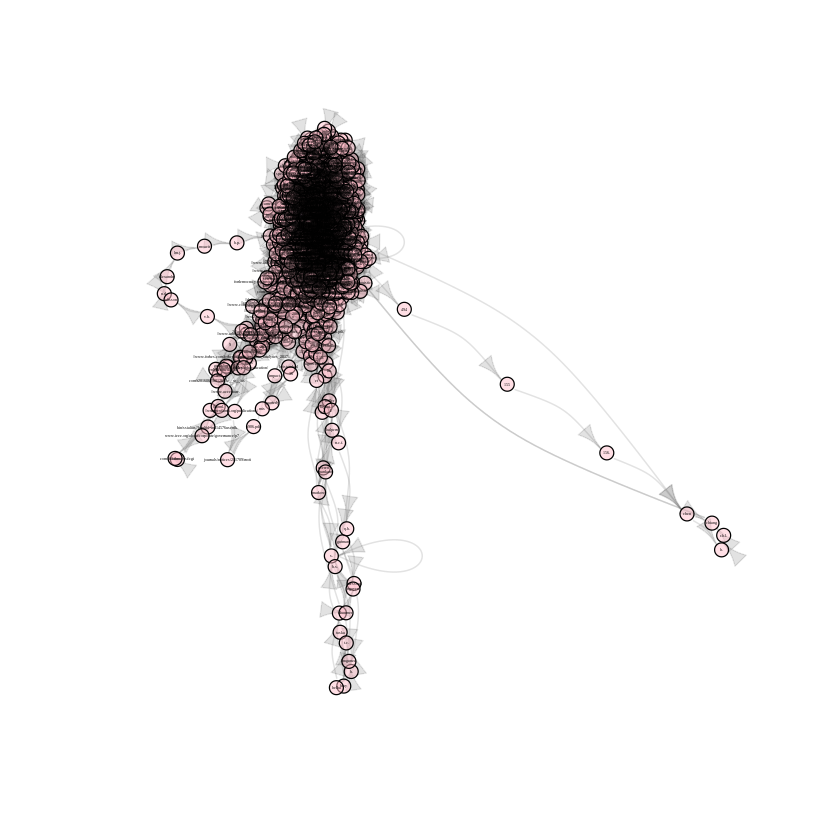

In [38]:
# Plot the duples network
plot(edge_list.net, 
     vertex.size = 5, 
     vertex.label.cex = .2, 
     vertex.label.distance = 0, 
     #vertex.color = rgb(240/255, 90/255, 93/255, 1.0),
     edge.curved = 0.3,
     edge.width = 1.2,
     arrow.size = .5,
     vertex.label.color = "black",
     edge.color = rgb(113/255, 114/255, 113/255, 0.2),
     )

In [39]:
# Plot the duples network
#This sets the image size to 4000 units by 4000 units 
#Sets the vertex size to 5
#Sets the size of text in each node to 0.8
#Sets the label distance from the vertex to 0 so it sits directly in the center
#Sets vertex color to a specific shade of red
#Sets the edges to contain a slight curve of 0.3
#edge with to 1.2 so it is visible
#Sets vertex label color to black 
#Sets the edge color to a specific shade of grey
png(file="final_word_plot.png", width=4000, height=4000)
plot(edge_list.net, 
     vertex.size = 5, 
     vertex.label.cex = .8, 
     vertex.label.distance = 0, 
     #vertex.color = rgb(240/255, 90/255, 93/255, 1.0),
     edge.curved = 0.3,
     edge.width = 1.2,
     arrow.size = .5,
     vertex.label.color = "black",
     edge.color = rgb(113/255, 114/255, 113/255, 0.2),
     )
dev.off()

png 
  2

# Interim Report

In [40]:
# Extract text from pdf
# Each page of pdf is one row
int_report <- pdf_text("InterimNASDSreport.pdf")
# Convert text to dataframe
int_report <- as.data.frame(int_report)

In [79]:
#int_report

In [42]:
#Subset the the specific 
#pages for chapter 2
chapter_2 <- as.data.frame(int_report[27:35,])
#head(chapter_2)

In [43]:
class(chapter_2)

[1] "data.frame"

In [44]:
#Create a for loop to help 
#add all the texts within these pages
#to one long string
alltext <- ""
for (r in 1:nrow(chapter_2)) {
    alltext <- paste(alltext, chapter_2[r,], sep = "")
}

In [45]:
#Convert all the text back
#back to a chapter 2 label
chapter_2 <- alltext

In [80]:
# Replace all instances of "\n" with a space - use escape characters
chapter_2 <-str_replace_all(chapter_2, "\\\n", " ")
#head(chapter_2)

In [47]:
# Replace all instances of the title with no space
chapter_2 <-str_replace_all(chapter_2, "\\(", " ")
chapter_2 <-str_replace_all(chapter_2, "\\)", " ")

In [48]:
# Delete all commas
chapter_2 <-str_replace_all(chapter_2, ",", "")

In [49]:
# Delete all colons
chapter_2 <-str_replace_all(chapter_2, ":", "")

In [50]:
# Delete all small hypens
chapter_2 <-str_replace_all(chapter_2, "-", "")

In [51]:
# Delete all quotation marks
chapter_2 <-str_replace_all(chapter_2, "“", "")
chapter_2 <-str_replace_all(chapter_2, "”", "")

In [52]:
# Delete all big hypens
chapter_2 <-str_replace_all(chapter_2, "—", "")

In [53]:
# Replace all instances of "\a" with a space - use escape characters
chapter_2 <-str_replace_all(chapter_2, "\\\a", " ")

In [54]:
# Delete all semicolons
chapter_2 <-str_replace_all(chapter_2, ";", "")

In [55]:
# Replace multiple spaces with one space
# s+ means 1 or more spaces.  \\ are excape characters
chapter_2 <-str_replace_all(chapter_2, "\\s+", " ")

In [56]:
# Convert all text to lowercase
chapter_2 <- tolower(chapter_2)

In [57]:
# Delete spaces at the start and end of our text
chapter_2 <-trimws(chapter_2)

In [81]:
#chapter_2

In [59]:
# Create an empty dataframe to hold our edge list
# It should start with 2 columns and 0 rows
# A for-loop will add to it
edge_list <- as.data.frame(matrix(nrow = 0, ncol = 2))
# Specify row names
colnames(edge_list) <- c("word_1", "word_2")

In [60]:
# Create an empty dataframe to hold each word/sentence combination
# It should have 2 columns and 1 row
# A for-loop will overwrite this for each loop
w_s_comb <- as.data.frame(matrix(nrow = 1, ncol = 2))
# Specify row names
colnames(w_s_comb) <- c("word_1", "word_2")

In [61]:
# Split the text into words
# Store those words in a variable
chapter_2_words <- strsplit(chapter_2, " ")[[1]]

In [82]:
#chapter_2_words

In [63]:
# Write a for loop that, on each loop over the list of all words:
## Stores the current word in a variable word_1
## Stores the next word in a variable word_2
## Stores word_1 in the word_1 column of the one-row dataframe
## Stores word_2 in the word_2 column of the one-row dataframe
## Binds the (re-writable) dataframe to the (now not empty) dataframe
for (r in 1:(length(chapter_2_words)-1)) {
    word_1 <- chapter_2_words[r]
    word_2 <- chapter_2_words[r+1]
    w_s_comb$word_1 <- word_1
    w_s_comb$word_2 <- word_2
    edge_list <- rbind(w_s_comb, edge_list)
}

In [64]:
# Look at our edge list
head(edge_list)

,word_1,word_2
,<chr>,<chr>
1,rights,reserved.
2,all,rights
3,sciences.,all
4,of,sciences.
5,academy,of
6,national,academy


In [65]:
# Convert our edge list to the R data type matrix
edge_list <- as.matrix(edge_list)

In [66]:
# Create a network graph object
edge_list.net <- graph.edgelist(edge_list)

In [67]:
#Makes every word we are tracking a square shape
V(edge_list.net)[V(edge_list.net)$name %in% tracking]$shape <- "square"

In [68]:
#Makes every word we are NOT tracking a circle shape
V(edge_list.net)[!V(edge_list.net)$name %in% tracking]$shape <- "circle"

In [69]:
#Makes every word we are tracking the color cornflowerblue
V(edge_list.net)[V(edge_list.net)$name %in% tracking]$color <- "cornflowerblue"

In [70]:
col2rgb("pink")

red,255
green,192
blue,203


In [71]:
#Makes every word we are NOT tracking a light transparent pink color
V(edge_list.net)[!V(edge_list.net)$name %in% tracking]$color <- rgb(255, 192, 203, max = 255, alpha = 127.5)

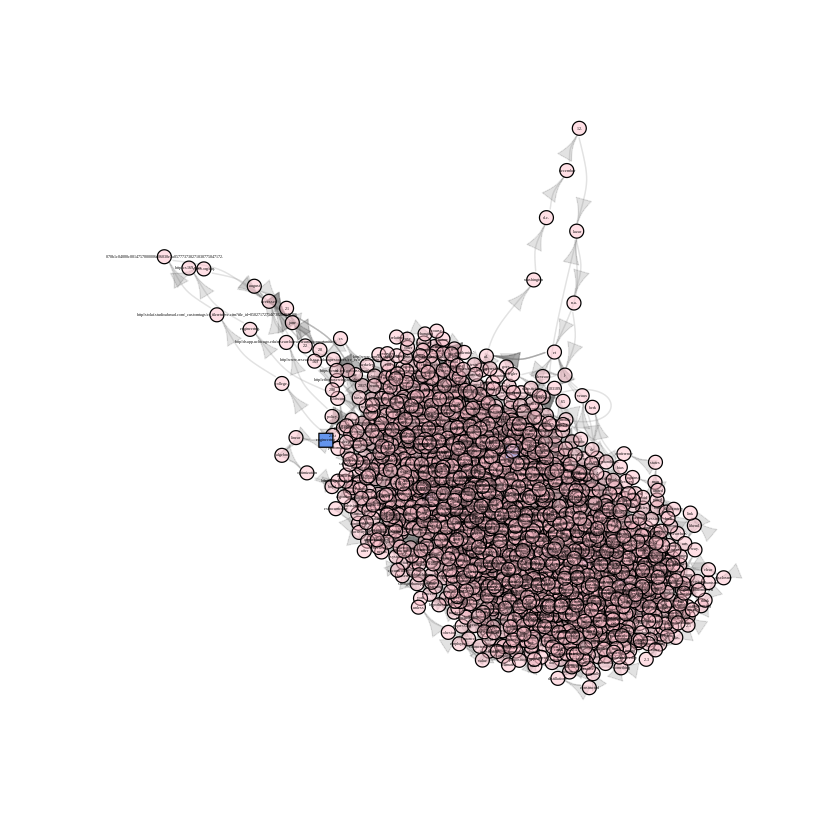

In [72]:
# Plot the duples network
plot(edge_list.net, 
     vertex.size = 5, 
     vertex.label.cex = .2, 
     vertex.label.distance = 0, 
     #vertex.color = rgb(240/255, 90/255, 93/255, 1.0),
     edge.curved = 0.3,
     edge.width = 1.2,
     arrow.size = .5,
     vertex.label.color = "black",
     edge.color = rgb(113/255, 114/255, 113/255, 0.2),
     )

In [73]:
# Plot the duples network
#This sets the image size to 4000 units by 4000 units 
#Sets the vertex size to 5
#Sets the size of text in each node to 0.8
#Sets the label distance from the vertex to 0 so it sits directly in the center
#Sets vertex color to a specific shade of red
#Sets the edges to contain a slight curve of 0.3
#edge with to 1.2 so it is visible
#Sets vertex label color to black 
#Sets the edge color to a specific shade of grey
png(file="interim_word_plot.png", width=4000, height=4000)
plot(edge_list.net, 
     vertex.size = 5, 
     vertex.label.cex = .2, 
     vertex.label.distance = 0, 
     #vertex.color = rgb(240/255, 90/255, 93/255, 1.0),
     edge.curved = 0.3,
     edge.width = 1.2,
     arrow.size = .5,
     vertex.label.color = "black",
     edge.color = rgb(113/255, 114/255, 113/255, 0.2),
     )
dev.off()

png 
  2

# Communities of Words Observation

One community of words observation that I noticed in both my interim and final report were the outlier community. Typically these nodes contained either URL links or not "real" words because of how much they were butchered during the cleaning process. E.g. the word "imagery" being broken up into the words "ima", "ge" and "ry". I believe these errors came mostly from the words that were seperated by either small or large hypens. 

# Closing Insights  

This analysis allowed to to look at chapter two of both the interim and final report and compare the network of words based on co-occurence in sentences and based on word proximity. I focused on the two words that were near each other and use that as the categorical method for my network. Different from my last analysis, I increased the size of the words I chose to track from "ability" and "data" to "ability", "data", "skills", "knowlegde", "learning", "science", "engineering" and "engineer". I believed these topics would be central to the discussion in both reports. When looking at my interim data visualization we were able to see central the words "learning" and "data" were to the pairing combinations and overall discussion in chapter two because of how prominently visible those nodes were. Our visuaization implemented transparency on the unwanted information to better view our desirables. In our final report however, it was impossible to point out the words we chose to track. However, viewers can see dark shades of blue near the center of the network. I believe that this fog of blue could potentially be more than one of our tracking words. To continue, I believe it is much harder to view the tracked words in the final report than the interim report because of the difference in size. The interim repoert was only eight pages while the final report contained 23. One trend that was consistent in both visualizations were the type of node outliers. In both networks these outliers were typically URLs or words ruined during the cleaning proccess. Moving forward, I think the cleaning process would be an area that I focus more on. With more time I would make sure I properly remove the non-text characters as well as find a way to remove page numbers and URL links. I would also take efforts to rescale the final report visualization to better see which tracked words are in the blue coloring near the center of the network. 

# Reflection 
i.) I was most comfortable with removing unwanted elements from my data 
ii.) The most difficult part that I eventually figured out was trying to make sure by data was not being cut off in the cleaning process.  
iii.) I am still stuggling with producing understandable visualizations, my issue is more when it omes to tweaking the plotting criteria to make the visuals most visible.